# Explore here

In [133]:
import os
import pandas as pd
import seaborn as sns
import spotipy
from dotenv import load_dotenv
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt 

# load the .env file variables:
load_dotenv()

# Retrieve the user credentials:
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")
                            
# Initialising Spotify API with client credentials:
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spy = spotipy.Spotify(auth_manager=auth_manager)

# Introduce the chosen artist artist ID:
artist_id = "4S2yOnmsWW97dT87yVoaSZ"

# This piece of code will call the object and retrieve the artist name:
artist_info = spy.artist(artist_id)
artist_name = artist_info["name"]
print(" 5.a) - Artist Name", "**", artist_name, "**")

# Getting the top tunes for the artist (I have included the setting "country", to enrich the search):
top_tracks = spy.artist_top_tracks(artist_id, country="US")

# Extract and print the top 10 track names of the selected artist:
print("\nTop 10 Tracks of your selected artist")

top_10_tracks = []
for idx, track in enumerate(top_tracks["tracks"][:10], start=1):
    track_name = track["name"]
    top_10_tracks.append(track_name)
    print(f"{idx}. {track_name}")

 5.a) - Artist Name ** NOFX **

Top 10 Tracks of your selected artist
1. Linoleum
2. Seeing Double at the Triple Rock
3. The Separation of Church and Skate
4. Don't Call Me White
5. Bob
6. Leave It Alone
7. Stickin In My Eye
8. Six Years on Dope
9. Idiots Are Taking Over
10. Dinosaurs Will Die


In [134]:
# Now we tretrieve for every song its length, and a parameter that Spotify provides to measure the popularity of each tune,
# given they don't provide of an exact number of reproductions and downloads:

print ("5.b) Now we are retrieving for each tune: Title, Length and Popularity(%):")
print("\n",artist_name, ":\n")
track_data = []
for idx, track in enumerate(top_tracks["tracks"][:10], start=1):
    track_name = track["name"]

    # Track duration comes in miliseconds, so we will convert units to minutes and seconds:
    duration_ms = track["duration_ms"]
    duration_min = duration_ms // 60000
    duration_sec = (duration_ms % 60000) // 1000

    # Popularity score as a proxy for plays:
    popularity = track["popularity"]
    
    print(f"{idx}. {track_name}")
    print(f"   Duration: {duration_min} min {duration_sec} sec")
    print(f"   Popularity (plays proxy): {popularity}")

    # Append to track data for potential analysis or DataFrame conversion
    track_data.append({
        "Track Name": track_name,
        "Duration (min)": duration_min,
        "Duration (sec)": duration_sec,
        "Popularity (Plays Proxy)": popularity
    })
    

5.b) Now we are retrieving for each tune: Title, Length and Popularity(%):

 NOFX :

1. Linoleum
   Duration: 2 min 10 sec
   Popularity (plays proxy): 57
2. Seeing Double at the Triple Rock
   Duration: 2 min 9 sec
   Popularity (plays proxy): 54
3. The Separation of Church and Skate
   Duration: 3 min 9 sec
   Popularity (plays proxy): 52
4. Don't Call Me White
   Duration: 2 min 33 sec
   Popularity (plays proxy): 52
5. Bob
   Duration: 2 min 2 sec
   Popularity (plays proxy): 51
6. Leave It Alone
   Duration: 2 min 4 sec
   Popularity (plays proxy): 50
7. Stickin In My Eye
   Duration: 2 min 24 sec
   Popularity (plays proxy): 49
8. Six Years on Dope
   Duration: 1 min 32 sec
   Popularity (plays proxy): 49
9. Idiots Are Taking Over
   Duration: 3 min 21 sec
   Popularity (plays proxy): 48
10. Dinosaurs Will Die
   Duration: 2 min 58 sec
   Popularity (plays proxy): 48


In [135]:
# Now well restrict the search to the most popular tunes of the artist, and present them in diccionaty format:

print("6.a) Now we are retrieving the top 3 tunes of the artist," "\n6.b) and structure them in a DataFrame in its dictionary format:")
print("\n",artist_name,":")

track_data = []
for idx, track in enumerate(top_tracks["tracks"][:3], start=1):
    track_name = track["name"]
    
    # Track duration in minutes and seconds
    duration_ms = track["duration_ms"]
    duration_sec = duration_ms // 1000  # Convert to seconds
    
    # Popularity score as a proxy for plays
    popularity = track["popularity"]
    
    # Append to track data for potential analysis or DataFrame conversion
    track_entry = {
        "Track Name": track_name,
        "Duration (sec)": duration_sec,
        "Popularity (Plays Proxy)": popularity
    }
    track_data.append(track_entry)
    
    # Print each track entry as a dictionary
    print(track_entry)

# Optional: if you want to print the whole `track_data` list of dictionaries
print("\nFull track data:")
print(track_data)

6.a) Now we are retrieving the top 3 tunes of the artist,
6.b) and structure them in a DataFrame in its dictionary format:

 NOFX :
{'Track Name': 'Linoleum', 'Duration (sec)': 130, 'Popularity (Plays Proxy)': 57}
{'Track Name': 'Seeing Double at the Triple Rock', 'Duration (sec)': 129, 'Popularity (Plays Proxy)': 54}
{'Track Name': 'The Separation of Church and Skate', 'Duration (sec)': 189, 'Popularity (Plays Proxy)': 52}

Full track data:
[{'Track Name': 'Linoleum', 'Duration (sec)': 130, 'Popularity (Plays Proxy)': 57}, {'Track Name': 'Seeing Double at the Triple Rock', 'Duration (sec)': 129, 'Popularity (Plays Proxy)': 54}, {'Track Name': 'The Separation of Church and Skate', 'Duration (sec)': 189, 'Popularity (Plays Proxy)': 52}]


7. The artist has been chosen due to its variability in tunes duration,
   providing with interesting data for the experiment:

 The tune distribution based on length and popularity for NOFX is:


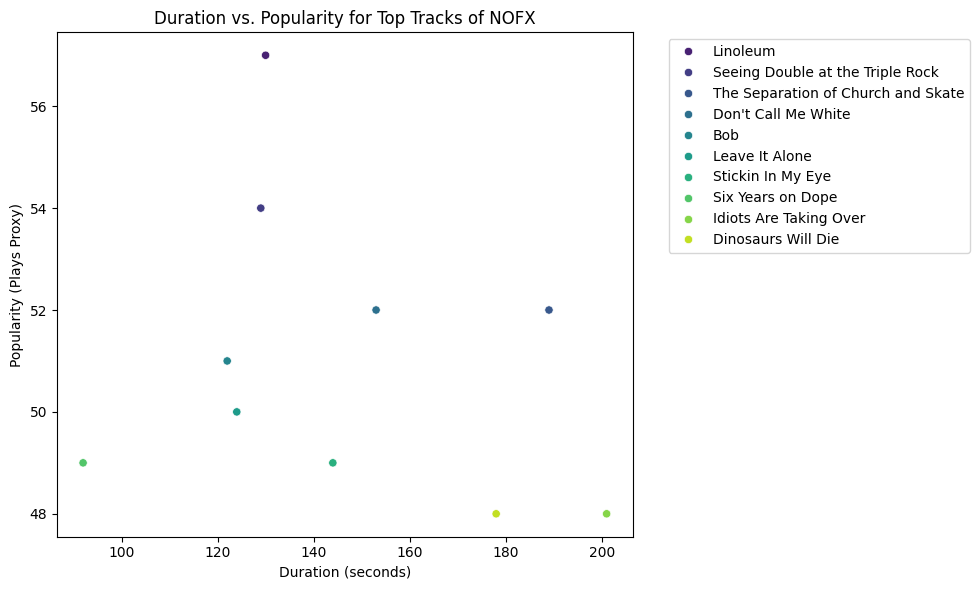

In [136]:
print("7. The artist has been chosen due to its variability in tunes duration," "\n   providing with interesting data for the experiment:")
print("\n The tune distribution based on length and popularity for", artist_name,"is:")

track_data = []
for idx, track in enumerate(top_tracks["tracks"][:10], start=1):
    track_name = track["name"]

    # Track duration in milliseconds and convert to seconds
    duration_ms = track["duration_ms"]
    duration_sec = duration_ms // 1000  # Total duration in seconds
    
    # Popularity score as a proxy for plays
    popularity = track["popularity"]
    
    # Append to track data for DataFrame
    track_data.append({
        "Track Name": track_name,
        "Duration (seconds)": duration_sec,
        "Popularity (Plays Proxy)": popularity
    })

# Convert to DataFrame
track_df = pd.DataFrame(track_data)

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=track_df, x="Duration (seconds)", y="Popularity (Plays Proxy)", hue="Track Name", palette="viridis")
plt.title(f"Duration vs. Popularity for Top Tracks of {artist_name}")
plt.xlabel("Duration (seconds)")
plt.ylabel("Popularity (Plays Proxy)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**CONLCUSIONS**

Based on this plot alone, it seems that song duration isn't a primary driver of popularity.
However, there's many otehr parameters that influence the popularity of a particular tune as:
- Musical gender/style.
- Tone.
- Rithm.
- Theme.
- etc...

Therefore, what I would suggest to study the relationship between track duration vs and popularity would be fixing as many variables as possible (i.e taking artists of the same age, and style), to aboid data masking due to external factors, and taking a larger number of tunes to observe any potential tendencies btween Duration and Popularity.

-> Another strategy that I would take is mining large number of random tunes to see if they follow a linear regresion model of Duration vs Popularity.